# Principle of operation of nontrivial zeros of the Riemann Zeta function
# リーマンゼータ関数の非自明なゼロ点の動作原理

To understand the principle of operation of the non-trivial zero point $Re(s) = \frac{1}{2}$ of the Riemann Zeta function, we will visualize it using the following code.

Each term of the zeta function is vectorized so that it has a structure that is arranged in a spiral structure.
This is then divided into two, the vector of the second half is inverted, and the two are connected from the end point of the first half.


リーマンゼータ関数の非自明なゼロ点 $Re(s) = \frac{1}{2}$ の動作原理を理解するために、以下のようなコードを用いて可視化します。

ゼータ関数の各項をベクトル化、らせん構造配置となる構造を持つようにします。
それを２分割して、後半半分をベクトル反転させ前半の終点よりつなぎます。


### Let's use an example of a normal logarithmic spiral (without turns).
### 普通の対数螺旋の例で説明する（折り返しなし）

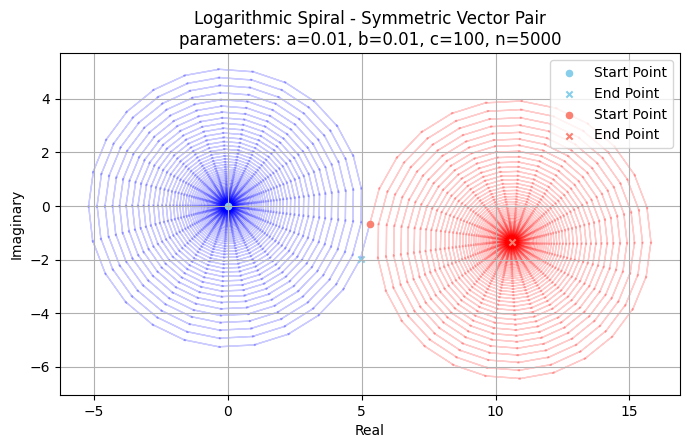

In [71]:
import numpy as np
import matplotlib.pyplot as plt

HEAD_WIDTH = 5 / 100  # 矢印の頭の幅
ALPHA = 0.2  # 矢印の透明度
# 螺旋のベクトルを対称に描く
VECTORS_MAX = 5000  # 最大ベクトル数
# 対数螺旋のパラメータ
n = VECTORS_MAX  # ベクトルの数
a = 0.01  # 螺旋のスケール
b = 0.01  # 成長率
c = 100  # 螺旋の回転速度
# 螺旋の角度（ラジアン）
theta = np.linspace(0, 4 * np.pi * c, n)

# 対数螺旋のベクトル生成（複素数で扱う）
# 螺旋の半径（極座標）
# 螺旋の半径は指数関数的に増加する
# 螺旋の角度は線形に増加する
r = a * np.exp(b * theta)  # 対数螺旋の半径
z = r * np.exp(1j * theta)  # 複素数で位置を表現

# ベクトル差（ベクトル群）
vectors = np.diff(z)
positions = z[:-1]  # ベクトルの始点たち

# ベクトルを2分割（対称に）
half = len(vectors) // 2
vec1 = vectors[:half]
pos1 = positions[:half]

vec2 = vectors[:half][::-1]  # 逆向き・逆順にして対称構造を作る
# 終点から描くための始点位置を計算
start_point = pos1[-1] + vec1[-1]
pos2 = [start_point]
for v in vec2[:-1]:
    pos2.append(pos2[-1] + v)
pos2 = np.array(pos2)

# プロット
plt.figure(figsize=(8, 8))
# 螺旋1
for p, v in zip(pos1, vec1):
    plt.arrow(
        p.real, p.imag, v.real, v.imag, head_width=HEAD_WIDTH, color="blue", alpha=ALPHA
    )
# 螺旋2
for p, v in zip(pos2, vec2):
    plt.arrow(
        p.real, p.imag, v.real, v.imag, head_width=HEAD_WIDTH, color="red", alpha=ALPHA
    )

# 始点と終点を描く
color1 = "skyblue"
color2 = "salmon"
sten_maker_size = 20
plt.scatter(pos1[0].real, pos1[0].imag, color=color1, s=sten_maker_size, label="Start Point", marker="o")
plt.scatter(pos1[-1].real, pos1[-1].imag, color=color1, s=sten_maker_size, label="End Point", marker="x")
plt.scatter(pos2[0].real, pos2[0].imag, color=color2, s=sten_maker_size, label="Start Point", marker="o")
plt.scatter(pos2[-1].real, pos2[-1].imag, color=color2, s=sten_maker_size, label="End Point", marker="x")

plt.legend(loc="upper right", fontsize=10)

plt.gca().set_aspect("equal")
plt.title(f"Logarithmic Spiral - Symmetric Vector Pair\nparameters: a={a}, b={b}, c={c}, n={n}")
plt.xlabel("Real")
plt.ylabel("Imaginary")
plt.grid(True)
plt.savefig("__logarithmic_spiral_symmetric_vector_pair-v0.png", dpi=300, bbox_inches="tight")
plt.show()

The graph above is closed completely.

上記のグラフを完全に閉じる図とする

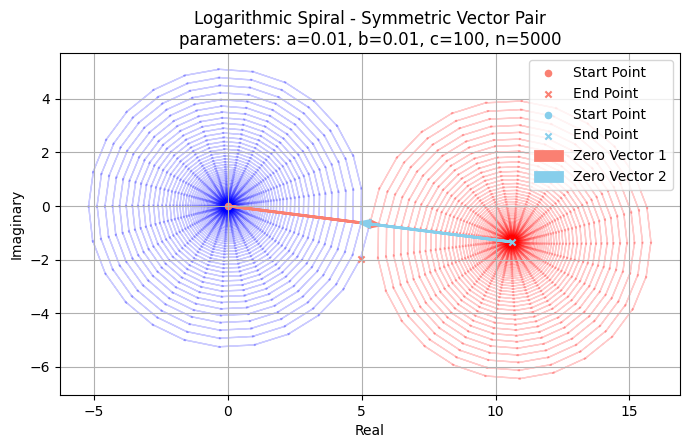

In [83]:
import numpy as np
import matplotlib.pyplot as plt

HEAD_WIDTH = 5 / 100  # 矢印の頭の幅
ALPHA = 0.2  # 矢印の透明度
# 螺旋のベクトルを対称に描く
VECTORS_MAX = 5000  # 最大ベクトル数
# 対数螺旋のパラメータ
n = VECTORS_MAX  # ベクトルの数
a = 0.01  # 螺旋のスケール
b = 0.01  # 成長率
c = 100  # 螺旋の回転速度
# 螺旋の角度（ラジアン）
theta = np.linspace(0, 4 * np.pi * c, n)

# 対数螺旋のベクトル生成（複素数で扱う）
# 螺旋の半径（極座標）
# 螺旋の半径は指数関数的に増加する
# 螺旋の角度は線形に増加する
r = a * np.exp(b * theta)  # 対数螺旋の半径
z = r * np.exp(1j * theta)  # 複素数で位置を表現

# ベクトル差（ベクトル群）
vectors = np.diff(z)
positions = z[:-1]  # ベクトルの始点たち

# ベクトルを2分割（対称に）
half = len(vectors) // 2
vec1 = vectors[:half]
pos1 = positions[:half]

vec2 = vectors[:half][::-1]  # 逆向き・逆順にして対称構造を作る
# 終点から描くための始点位置を計算
start_point = pos1[-1] + vec1[-1]
pos2 = [start_point]
for v in vec2[:-1]:
    pos2.append(pos2[-1] + v)
pos2 = np.array(pos2)

# プロット
plt.figure(figsize=(8, 8))
# 螺旋1
for p, v in zip(pos1, vec1):
    plt.arrow(
        p.real, p.imag, v.real, v.imag, head_width=HEAD_WIDTH, color="blue", alpha=ALPHA
    )
# 螺旋2
for p, v in zip(pos2, vec2):
    plt.arrow(
        p.real, p.imag, v.real, v.imag, head_width=HEAD_WIDTH, color="red", alpha=ALPHA
    )

# 始点と終点を描く
color1 = "salmon"
color2 = "skyblue"
sten_maker_size = 20
plt.scatter(pos1[0].real, pos1[0].imag, color=color1, s=sten_maker_size, label="Start Point", marker="o")
plt.scatter(pos1[-1].real, pos1[-1].imag, color=color1, s=sten_maker_size, label="End Point", marker="x")
plt.scatter(pos2[0].real, pos2[0].imag, color=color2, s=sten_maker_size, label="Start Point", marker="o")
plt.scatter(pos2[-1].real, pos2[-1].imag, color=color2, s=sten_maker_size, label="End Point", marker="x")
# 螺旋の中心点は螺旋２の始点
center = pos2[0]
# 螺旋１始点と螺旋２終点からそれぞれ中心に向かう矢印を描く（＝ゼロベクトルの追加）
# 螺旋１始点から中心に向かう矢印
plt.arrow(
    pos1[0].real, pos1[0].imag, center.real - pos1[0].real, center.imag - pos1[0].imag,
    head_width=HEAD_WIDTH*5, color=color1, alpha=1, linewidth=2,
    label="Zero Vector 1"
)
# 螺旋２終点から中心に向かう矢印
plt.arrow(
    pos2[-1].real, pos2[-1].imag, center.real - pos2[-1].real, center.imag - pos2[-1].imag,
    head_width=HEAD_WIDTH*5, color=color2, alpha=1, linewidth=2,
    label="Zero Vector 2"
)

plt.legend(loc="upper right", fontsize=10)

plt.gca().set_aspect("equal")
plt.title(f"Logarithmic Spiral - Symmetric Vector Pair\nparameters: a={a}, b={b}, c={c}, n={n}")
plt.xlabel("Real")
plt.ylabel("Imaginary")
plt.grid(True)
plt.savefig("__logarithmic_spiral_symmetric_vector_pair-closure_v0.png", dpi=300, bbox_inches="tight")
plt.show()

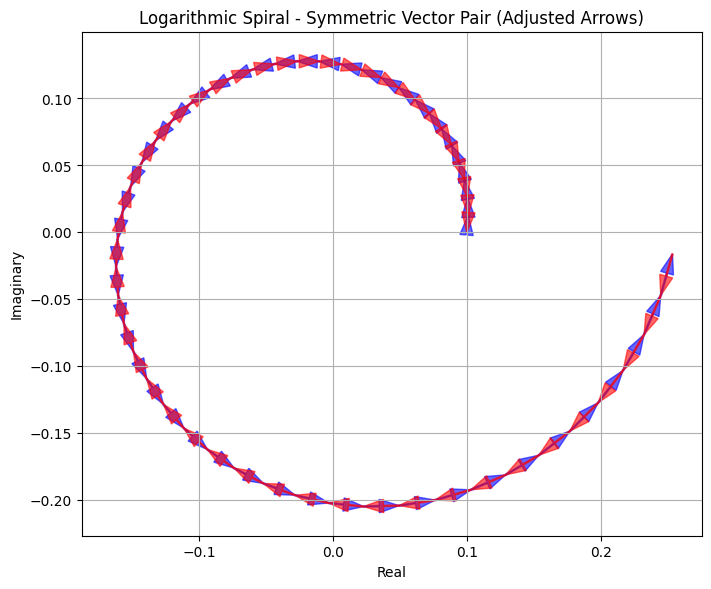

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# 矢印のサイズを調整して再プロット（head_widthを小さく）
plt.figure(figsize=(8, 8))
# 螺旋1
for p, v in zip(pos1, vec1):
    plt.arrow(p.real, p.imag, v.real, v.imag, head_width=0.01, color='blue', alpha=0.6, length_includes_head=True)
# 螺旋2
for p, v in zip(pos2, vec2):
    plt.arrow(p.real, p.imag, v.real, v.imag, head_width=0.01, color='red', alpha=0.6, length_includes_head=True)

plt.gca().set_aspect('equal')
plt.title("Logarithmic Spiral - Symmetric Vector Pair (Adjusted Arrows)")
plt.xlabel("Real")
plt.ylabel("Imaginary")
plt.grid(True)
plt.show()


## Riemann Zeta Function

Low-precision floating-point version / 浮動小数点数精度低いバージョン


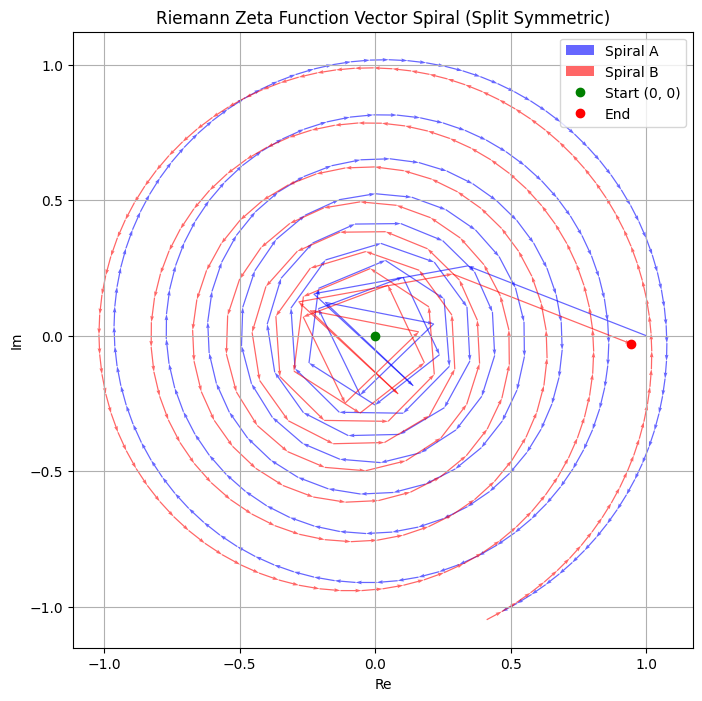

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# パラメータ設定
s_real = 0.5  # Re(s) = 1/2 固定
t = 14.135  # 最初の非自明なゼロ点の近傍
n_max = 500  # ベクトル数
n = np.arange(1, n_max + 1)

# ベクトル生成：1/n^s * exp(-it log n)
r = 1 / (n ** s_real)
theta = -t * np.log(n)
vectors = r * np.exp(1j * theta)

# 2分割
half = len(vectors) // 2
vec1 = vectors[:half]
vec2 = -vectors[:half][::-1]  # 対称な逆向きのベクトル群

# 累積和で座標を求める
points1 = np.cumsum(vec1)
start_point2 = points1[-1] + vec1[-1]
points2 = [start_point2]
for v in vec2[:-1]:
    points2.append(points2[-1] + v)
points2 = np.array(points2)

# プロット準備
fig, ax = plt.subplots(figsize=(8, 8))

# ベクトル群1（青）
ax.quiver(points1[:-1].real, points1[:-1].imag,
          np.diff(points1).real, np.diff(points1).imag,
          angles='xy', scale_units='xy', scale=1, width=0.002, alpha=0.6, color='blue', label="Spiral A")

# ベクトル群2（赤）
ax.quiver(points2[:-1].real, points2[:-1].imag,
          np.diff(points2).real, np.diff(points2).imag,
          angles='xy', scale_units='xy', scale=1, width=0.002, alpha=0.6, color='red', label="Spiral B")

# 始点と終点
ax.plot([0], [0], 'go', label="Start (0, 0)")
ax.plot([points2[-1].real], [points2[-1].imag], 'ro', label="End")

# グラフ設定
ax.set_title("Riemann Zeta Function Vector Spiral (Split Symmetric)")
ax.set_xlabel("Re")
ax.set_ylabel("Im")
ax.grid(True)
ax.axis('equal')
ax.legend()

plt.show()


### Non-trivial Zeros / 非自明なゼロ点の場合

Floating-point high-precision version / 浮動小数点数高精度バージョン

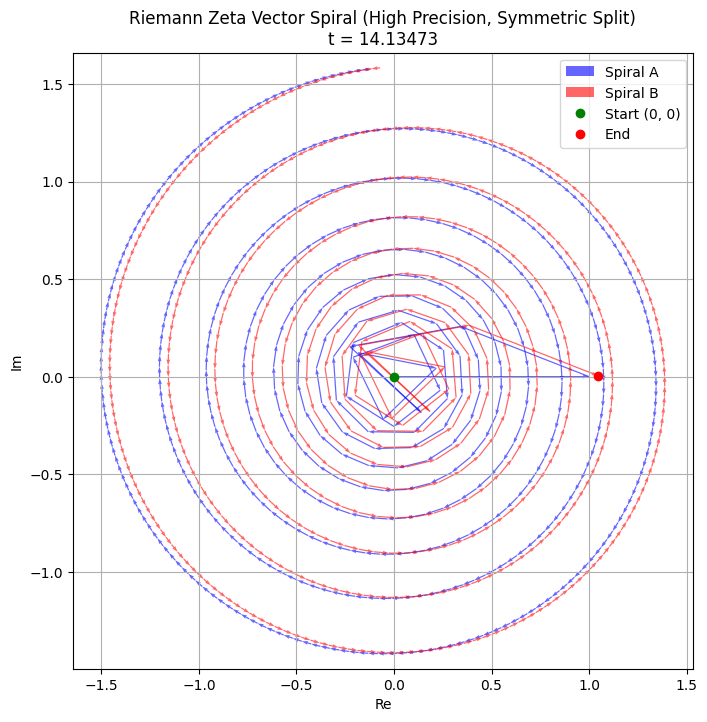

In [17]:
import mpmath
from mpmath import mp, mpf, mpc, log, exp, pi
import matplotlib.pyplot as plt
import numpy as np

# 高精度設定
mp.dps = 50

# パラメータ設定
s_real = mpf("0.5")
# t = mpf("14.134725141734693790457251983562470270784257115699")  # 最初の非自明なゼロ点（高精度）
t = mpmath.zetazero(1).imag
n_max = 1000
n = [mpf(k) for k in range(1, n_max + 1)]

# ベクトル生成：1/n^s * exp(-it log n)
vectors = [1 / (k ** s_real) * exp(-1j * t * log(k)) for k in n]

# 2分割
half = len(vectors) // 2
vec1 = vectors[:half]
vec2 = [-v for v in vec1[::-1]]  # 対称な逆向きのベクトル群

# 累積和で座標を求める
points1 = [mpc(0)]
for v in vec1:
    points1.append(points1[-1] + v)

start_point2 = points1[-1] + vec1[-1]
points2 = [start_point2]
for v in vec2[:-1]:
    points2.append(points2[-1] + v)

# numpy 用に変換して描画 (mpmath -> float)
points1_np = np.array([[float(p.real), float(p.imag)] for p in points1])
points2_np = np.array([[float(p.real), float(p.imag)] for p in points2])

# プロット
fig, ax = plt.subplots(figsize=(8, 8))

# 螺旋1（青）
ax.quiver(points1_np[:-1, 0], points1_np[:-1, 1],
          np.diff(points1_np[:, 0]), np.diff(points1_np[:, 1]),
          angles='xy', scale_units='xy', scale=1, width=0.002, alpha=0.6, color='blue', label="Spiral A")

# 螺旋2（赤）
ax.quiver(points2_np[:-1, 0], points2_np[:-1, 1],
          np.diff(points2_np[:, 0]), np.diff(points2_np[:, 1]),
          angles='xy', scale_units='xy', scale=1, width=0.002, alpha=0.6, color='red', label="Spiral B")

# 始点と終点
ax.plot([0], [0], 'go', label="Start (0, 0)")
ax.plot([points2_np[-1, 0]], [points2_np[-1, 1]], 'ro', label="End")

# グラフ設定
ax.set_title(f"Riemann Zeta Vector Spiral (High Precision, Symmetric Split)\nt = {float(t):.5f}")
ax.set_xlabel("Re")
ax.set_ylabel("Im")
ax.grid(True)
ax.axis('equal')
ax.legend()

plt.savefig(f"__riemann_zeta_spiral-v1-t={float(t):.5f}.png", dpi=300)

plt.show()
plt.close()


### not Non-trivial not zero points / 非自明なゼロ点ではない場所

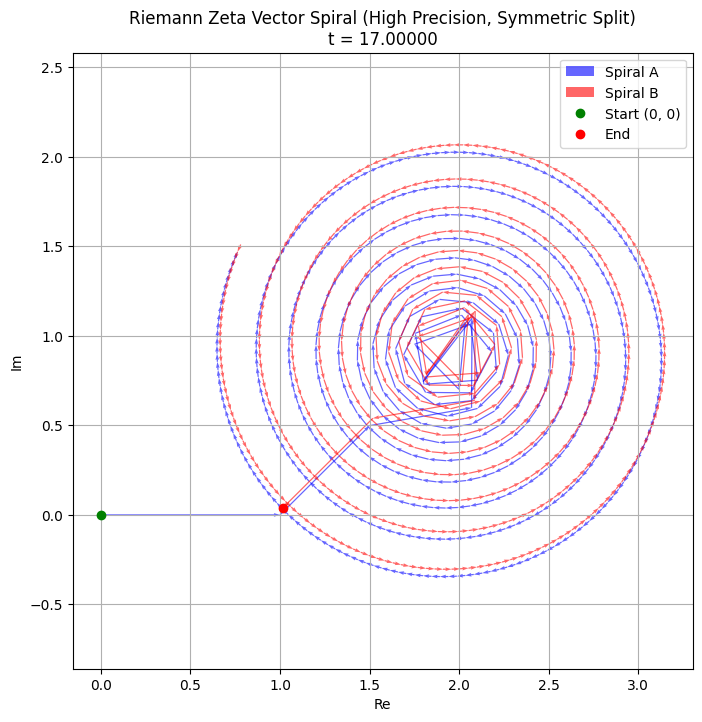

In [16]:
import mpmath
from mpmath import mp, mpf, mpc, log, exp, pi
import matplotlib.pyplot as plt
import numpy as np

# 高精度設定
mp.dps = 50

# パラメータ設定
s_real = mpf("0.5")
t = mpf("17.0")
# t = mpmath.zetazero(1).imag
n_max = 1000
n = [mpf(k) for k in range(1, n_max + 1)]

# ベクトル生成：1/n^s * exp(-it log n)
vectors = [1 / (k ** s_real) * exp(-1j * t * log(k)) for k in n]

# 2分割
half = len(vectors) // 2
vec1 = vectors[:half]
vec2 = [-v for v in vec1[::-1]]  # 対称な逆向きのベクトル群

# 累積和で座標を求める
points1 = [mpc(0)]
for v in vec1:
    points1.append(points1[-1] + v)

start_point2 = points1[-1] + vec1[-1]
points2 = [start_point2]
for v in vec2[:-1]:
    points2.append(points2[-1] + v)

# numpy 用に変換して描画 (mpmath -> float)
points1_np = np.array([[float(p.real), float(p.imag)] for p in points1])
points2_np = np.array([[float(p.real), float(p.imag)] for p in points2])

# プロット
fig, ax = plt.subplots(figsize=(8, 8))

# 螺旋1（青）
ax.quiver(points1_np[:-1, 0], points1_np[:-1, 1],
          np.diff(points1_np[:, 0]), np.diff(points1_np[:, 1]),
          angles='xy', scale_units='xy', scale=1, width=0.002, alpha=0.6, color='blue', label="Spiral A")

# 螺旋2（赤）
ax.quiver(points2_np[:-1, 0], points2_np[:-1, 1],
          np.diff(points2_np[:, 0]), np.diff(points2_np[:, 1]),
          angles='xy', scale_units='xy', scale=1, width=0.002, alpha=0.6, color='red', label="Spiral B")

# 始点と終点
ax.plot([0], [0], 'go', label="Start (0, 0)")
ax.plot([points2_np[-1, 0]], [points2_np[-1, 1]], 'ro', label="End")

# グラフ設定
ax.set_title(f"Riemann Zeta Vector Spiral (High Precision, Symmetric Split)\nt = {float(t):.5f}")
ax.set_xlabel("Re")
ax.set_ylabel("Im")
ax.grid(True)
ax.axis('equal')
ax.legend()

plt.savefig(f"__riemann_zeta_spiral-v1-t={float(t):.5f}.png", dpi=300)

plt.show()
plt.close()


---